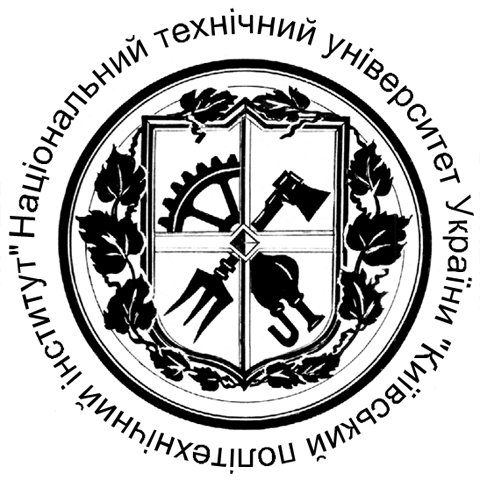



# Курсова Робота 
Звіт з курсової роботи 
з дисципліни "Методи Оптимізації"
на тему: модифікований метод Розенброка 

## Зміст
- Вступ
- Матеріали та методи
- - Вибір початкової точки і напрямків
- - Ітерація методу
- - Ітерація методу в даному випадку
- - Зміна напрямків
- - Критерій закінчення 
- - Реалізація методу умовної оптимізації
- Вирішення проблеми
- - Імпорт необхідних бібліотек
- - Визначення функцій
- - Обчислення
- Висновки
- Посилання

## Вступ
Проблема багатовимірної оптимізації часто полягає в неможливості аналітичного відображення цільової функції, тобто функції, яка мінімізується. Для вирішення даної проблеми використовуються чисельні методи, які дозволяють використовувати для мінімізації лише значення цільової функції в деякій точці, при цьому зводячи всі інщі, залежні від функції, дані (такі як похідні) до чисельних методів їх підрахунку. В даній роботі буде описано та програмно реалізоване один з методів багатовимірної оптимізації 0-го порядку, а саме модифікований метод Розенброка. 

## Матеріали та Методи 
Модифікований метод Розенброка є модифікацією, що запропонували Девіс, Свенн та Кемпі (ДСК). Оригінальний метод Розенброка полягає в спробах невеликих кроків по деяким ортогональним напрямкам, якщо такі кроки не є можливими, то ортогональна систем напрямків змінюється і ітерація продовжується. У цій роботі сам метод детально розглянутий не буде, за деталями можно звернутися до "Прикладное нелинейное программирование" Д. Химмельблау, ст. 173. 

Модифікація, запропонована ДСК, полягає в зміні способу проходження по ортогональним напрямкам на виконання одновимірного пошуку по напрямку для визначення мінімуму. Після визначення мінімуму по кожному з ортогональних напрямків, будується новий напрямой, як вектор, що проходить через 1 та 3 точки, будуються напрямки ортогональні до нього (за домогою методу Грамма-Шмідта), проходить перевірка критерію закінчення, алгоритм повторюється. Більш детально метод виглядає наступним чином:

### Вибір початкової точки і напрямків
Початкова точка задається будь-яким чином, у випадку умовної оптимізації вона зажається всередині області. Початковими напрями частіше всього обираються вектори паралельні осям координат та за модулем рівні одиниці. Початкову точку будемо називати X0б напрямки, відповідно до змінних X1, X2... Xn - S1, S2... Sn

### Ітерація методу 
По кожному з напрямків S1, S2... Sn виконується одновимірний пошук. Обирається перший напрямок, по ньому, для визначення інтервалу невизначенності, виконується пошук алгоритмом Свена. Після визначення інтервалу, в ньому виконується одновимірний пошук будь-яким методом. В даному випадку буде використано метод ДСК-Пауела. Мінімум, який отримано одновимірним пошуком, приймається наступною точкою X1. З точки X1 алгоритм повторюється для напрямку S2, щоб отримати точку X2 і так далі до точки Xn

### Зміна напрямків
Після визначення всіх точок необхідно змінити напрямки. Визначимо вектори нових напрямків наступним чином:

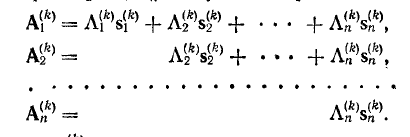

Де Sn - старі напрямки. Велика Дельта - сума усіх успішних проходів по відповідному напрямку. При цьому A1 приймається за новий напрямок, а всі інші напрямки будуються як ортогональні до нього методом Грамма-Шмідта 

### Зміна напрямків в даному випадку
Оскільки ми розглядаємо метод на функціях двох зміних, то в нашому випадку алгоритм зміни напрямків значно спрощується. Після проходу по обом напрямкам ми отримаємо точки X0, X1, X2. Новим напрямком S1 приймаємо вектор X0X2, а другим - перпендикулярний до нього, для цього змінемо одну з координат вектора за знаком. За нову початкову точку (для новох операції) приймемо точку Х2


### Критерій закінчення
В якості критерію закінчення в модифікованоум методі Розенброка виконується перевірка величини кроку між X0 попередньої ітерації та поточної. Якщо цей крок не перевищує деякого епсілон, то критерій вважається виконаним, а поточна точка Х0 - мінімумом функції


### Метод для реалізації умовної оптимізації
У випадку умовної оптимізації сутність методу не змінюється. Як доповненя до нього буде використано метод штрафних функцій, а саме метод квадрату зрізання. Сутність методу полягає в накладенні на основну функцію штрафу для кожної умови g1, g2... gn. Штраф збільшує щначення функції виступаючи бар'єром під час пошуку. Пошук виконується для все більшого і більшого штрафу, отримуючи різні точки мінімуму. Коли різниця між двома останніми точками мінімуму буде менша за деякий параметр епсілон - пошук можна вважати завершеним, а отриману точку мінімумом. У випадку штрафу квадрату зрізу штрафна функція буде виглядти настпуним чином:


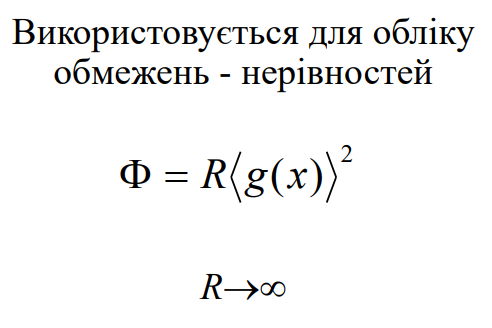

Де g(x) - обмеження нерівності виду: g(x) >= 0

## Вирішення проблеми 


### Імпорт необхідних бібліотек

In [17]:
# імпорт необхідних бібліотек
import math
import matplotlib.pyplot as plt

### Defining constants

In [2]:
# початкова лямбда для пошуку алгоритму Свена
LAMBDA0 = 0
# Логічна змінна, що відповідає за припенення виконання методу
STOP = False 
# Точність пошуку мінімуму
END = 0.00001
# Точність виконання одновимірного пошуку
EPSILON = 0.02
# Число-модифікатор кроку алгоритму Свена
SVEN = 0.02
# Початкові напрямки 
S1 = (1, 0)
S2 = (0, 1)
# Початкова точка
X0 = (-1.2, 0)
# Глобальний каунтер для підрахунку кількості разів виклику цільової функції
COUNTER = 0

### Визначення функцій
Функція, що реалізує підрахунок цільової функції. В якості цільової функції використано функцію Розенброка


In [3]:
def f(x1, x2):
	global COUNTER
	COUNTER += 1
	foo = (1-x1)**2 + 100*(x2-x1**2)**2
	return foo

Функції для реалізації алгоритму Свена (https://studfile.net/preview/7463220/page:2/)

In [4]:
# функція для пошуку норми вектора
def norm(x1, x2):
	return math.sqrt(x1**2 + x2**2)

# функція реалізації підрахунку кроку алгоритму Свена
def delta_lambda(x1, x2, s1, s2):
	global SVEN
	return SVEN*(norm(x1, x2)/norm(s1, s2))

# функція, що реалізує алгоритм свена для пошуку інтервалу невизначенності
def alg_sven(x1, x2, delta, lambda0, s):
    # визначення в який бік по напрямку необхідно рухатися алгоритму
	lambdas = [lambda0]
	f_0 = f(x1+s[0]*lambda0, x2+s[1]*lambda0)

	lambda_left = lambda0 - delta
	f_left = f(x1+s[0]*lambda_left, x2+s[1]*lambda_left)

	lambda_right = lambda0 + delta
	f_right = f(x1+s[0]*lambda_right, x2+s[1]*lambda_right)

	if f_left < f_0:
		mode = 'left'
		lambdas.append(lambda_left)
	else:
		mode = 'right'
		lambdas.append(lambda_right)
    # ітерація алгоритму до моменту зупинки через завелике значення функції
	while f(x1+s[0]*lambdas[-1], x2+s[1]*lambdas[-1]) < f(x1+s[0]*lambdas[-2], x2+s[1]*lambdas[-2]):
		
		if mode == 'left':
			new_lambda = lambdas[-1] - delta*(2**(len(lambdas)-1))
		else:
			new_lambda = lambdas[-1] + delta*(2**(len(lambdas)-1))
		lambdas.append(new_lambda)
    #крок алгоритму назад на половинне значення
	new_lambda = (lambdas[-1]+lambdas[-2])/2
	if f(x1+s[0]*new_lambda, x2+s[1]*new_lambda) < f(x1+s[0]*lambdas[-2], x2+s[1]*lambdas[-2]):
		a, b = lambdas[-2], lambdas[-1]
	else:
		idx = -2 if len(lambdas)<3 else -3 
		a, b = lambdas[idx], new_lambda
    # вертання алгоритмом інтервалу невизначенності
	return min(a,b), max(a,b)

Функції для реалізації одновимірного пошуку за алгоритмом ДСК-Пауєлла

In [5]:
def dsk_pauell(x1, x2, s, a, b, epsilon):
	stop = False
    # визначення проміжку для алгоритму ДСК
	xm = (a + b)/2
	f_a = f(x1+s[0]*a, x2+s[1]*a)
	f_b = f(x1+s[0]*b, x2+s[1]*b)
	f_xm = f(x1+s[0]*xm, x2+s[1]*xm)
    # побудова апроксимуючих парабол
	x_star = xm + ((b-xm)*(f_a-f_b))/(2*(f_a-2*f_xm+f_b))
	f_xstar = f(x1+s[0]*x_star, x2+s[1]*x_star)

	stop = abs(f_xm-f_xstar) <= epsilon and abs(xm-x_star) <= epsilon

	while not stop:
		dots = [(a, f_a), (xm, f_xm), (x_star, f_xstar), (b, f_b)]
		dots = sorted(dots, key=lambda p:p[0])
		if dots[1][1] <= dots[2][1]:
			a = dots[0][0]
			xm = dots[1][0]
			b = dots[2][0]
		else:
			a = dots[1][0]
			xm = dots[2][0]
			b = dots[3][0]

		assert a < xm < b, f"{a}, {xm}, {b}"
        # визначення нового проміжку
		f_a = f(x1+s[0]*a, x2+s[1]*a)
		f_b = f(x1+s[0]*b, x2+s[1]*b)
		f_xm = f(x1+s[0]*xm, x2+s[1]*xm)

		a1 = (f_xm-f_a)/(xm-a)
		a2 = ((f_b-f_a)/(b-a)-(f_xm-f_a)/(xm-a))/(b-xm)

		x_star = (a+xm)/2 - a1/(2*a2)
		f_xstar = f(x1+s[0]*x_star, x2+s[1]*x_star)
		stop = abs(f_xm-f_xstar) <= epsilon and abs(xm-x_star) <= epsilon
    # повернення мінімуму, визначеного методом
	return x_star

Функція для виконання проходу по напрямку

In [6]:
def iteration(X, S, method):
    # визначення початкової дельти для алгоритму Свена
	delta = delta_lambda(X[0], X[1], S[0], S[1])
    # визначення інтервалу невизначенності
	a, b = alg_sven(X[0], X[1], delta, LAMBDA0, S)
    # пошук мінінмуму та повертання його
	_lambda = method(X[0], X[1], S, a, b, EPSILON)
	return X[0]+_lambda*S[0], X[1]+_lambda*S[1]

Функції для реалізації новиї напрямків

In [7]:
def new_s(x0, x2):
	s1_0 = x2[0] - x0[0]
	s1_1 = x2[1] - x0[1]
	s1 = (s1_0, s1_1)
	s2 = (s1_0, -s1_1)
	return s1, s2

### Обчислення

Основна частина програми, що реалізує метод

-------------------------------------------------
X_1 = (0.0998307908714613, 0.0)
X_2 = (0.0998307908714613, 0.009966186806021507)
S_1 = (-1.2998307908714613, -0.009966186806021507)
S_2 = (-1.2998307908714613, 0.009966186806021507)
S_len = 1.2998689971597064
-------------------------------------------------
Main function counter: 46
-------------------------------------------------
-------------------------------------------------
X_1 = (0.18170187217449918, 0.010593916581317881)
X_2 = (0.18098575254421598, 0.01059940728215447)
S_1 = (-0.08115496167275468, -0.0006332204761329632)
S_2 = (-0.08115496167275468, 0.0006332204761329632)
S_len = 0.08115743202121217
-------------------------------------------------
Main function counter: 78
-------------------------------------------------
-------------------------------------------------
X_1 = (0.18286657996038053, 0.010614082644047809)
X_2 = (0.18102176056539976, 0.010628477049412444)
S_1 = (-3.600802118378099e-05, -2.906976725797379e-05)
S_

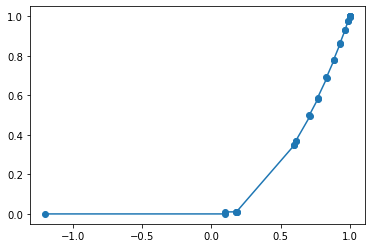

In [8]:
	XR = [X0]
	XS = [X0]
	while not STOP:
		print("-------------------------------------------------")
		X1 = iteration(X0, S1, dsk_pauell)
		print(f'X_1 = {X1}')
		XS.append(X1)

		X2 = iteration(X1, S2, dsk_pauell)
		print(f'X_2 = {X2}')
		XS.append(X2)

		S1, S2 = new_s(X2, X0)
		X0 = X2
		print(f'S_1 = {S1}')
		print(f'S_2 = {S2}')
		S1_len = math.sqrt(S1[0]**2 + S1[1]**2)
		print(f'S_len = {S1_len}')
		if S1_len < END:
			STOP = True
		print("-------------------------------------------------")
		print(f'Main function counter: {COUNTER}')
		print("-------------------------------------------------")


	dots_x = [X[0] for X in XS]
	dots_y = [X[1] for X in XS]


	plt.figure(0)

	plt.plot(dots_x, dots_y, marker='o')

	plt.show()


Теперь реалізуємо умовну оптимізацю для декількох випадків

Константи, необхідні для умовної оптимізації

In [9]:
# логічна змінна для зупинки методу штрафної функції
STOP_R = False 
# Нова точність критерію зупинки
END = 0.01
# критерій зупинку штрафної функції
R_EPSILON = 0.001
# початковий штраф
R = 1
LAMBDA0 = 0
STOP = False 
STOP_R = False 
EPSILON = 0.02
S1 = (1, 0)
S2 = (0, 1)
X0 = (-1.2, 0)

COUNTER = 0

Задамо функції-обмеження

In [10]:
# випукла функція-обмеження що містить і початкову, і кінцеву точки
def g1(x1, x2):
	return 16 - (x1+2)**2 - (x2-0)**2

Задамо функцію що обчислює цільову функцію, але накладемо на неї штрафну


In [11]:
# функція для реалізації штрафу квадрату зрізання
def cut(alpha):
	if alpha <= 0:
		return alpha
	else:
		return 0

# цільова функція зі штрафною
def f(x1, x2):
	global COUNTER
	COUNTER += 1
	foo = (1-x1)**2 + 100*(x2-x1**2)**2  + R*(cut(g1(x1, x2))**2)
	return foo

Виконаємо обчислення для умовнуї оптимізації

-------------------------------------------------
X_1 = (0.0998307908714613, 0.0)
X_2 = (0.0998307908714613, 0.009966186806021507)
S_1 = (-1.2998307908714613, -0.009966186806021507)
S_2 = (-1.2998307908714613, 0.009966186806021507)
S_len = 1.2998689971597064
-------------------------------------------------
Main function counter: 46
-------------------------------------------------
-------------------------------------------------
X_1 = (0.18170187217449918, 0.010593916581317881)
X_2 = (0.18098575254421598, 0.01059940728215447)
S_1 = (-0.08115496167275468, -0.0006332204761329632)
S_2 = (-0.08115496167275468, 0.0006332204761329632)
S_len = 0.08115743202121217
-------------------------------------------------
Main function counter: 78
-------------------------------------------------
-------------------------------------------------
X_1 = (0.18286657996038053, 0.010614082644047809)
X_2 = (0.18102176056539976, 0.010628477049412444)
S_1 = (-3.600802118378099e-05, -2.906976725797379e-05)
S_

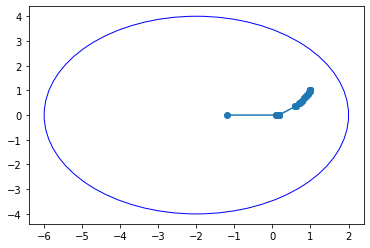

In [12]:
if __name__ == '__main__':
	
	XR = [X0]
	XS = [X0]
	while not STOP_R:
		STOP = False
		while not STOP:
			print("-------------------------------------------------")
			X1 = iteration(X0, S1, dsk_pauell)
			print(f'X_1 = {X1}')
			XS.append(X1)

			X2 = iteration(X1, S2, dsk_pauell)
			print(f'X_2 = {X2}')
			XS.append(X2)

			S1, S2 = new_s(X2, X0)
			X0 = X2
			print(f'S_1 = {S1}')
			print(f'S_2 = {S2}')
			S1_len = math.sqrt(S1[0]**2 + S1[1]**2)
			print(f'S_len = {S1_len}')
			if S1_len < END:
				STOP = True
			print("-------------------------------------------------")
			print(f'Main function counter: {COUNTER}')
			print("-------------------------------------------------")

		XR.append(X0)
		check = math.sqrt((XR[-1][0] - XR[-2][0])**2+(XR[-1][1] - XR[-2][1])**2)
		print(check)
		if check < R_EPSILON:
			STOP_R = True
		else:
			R = R * 10
			print("*************************************************")
			print(f'R: {R}')
			print("*************************************************")



	dots_x = [X[0] for X in XS]
	dots_y = [X[1] for X in XS]


	plt.figure(0)

	plt.plot(dots_x, dots_y, marker='o')
	circle2 = plt.Circle((-2, 0), 4, fill = False, color = 'b')
	plt.gca().add_patch(circle2)


	plt.show()



Теперь реалізуємо умовну оптимізацію для точки мінімуму, що лежить поза зоною обмеження
Також перевіримо алгоритм для невипуклого обмеження

In [14]:
# обмеження "в зоні"
def g1(x1, x2):
	return 16 - (x1+2)**2 - (x2-0)**2

# обмеження "поза зоною"
def g2(x1, x2):
	return - 1 + (x1-1)**2 + (x2-1)**2	

# цільова функція з штрафом
def f(x1, x2):
	global COUNTER
	COUNTER += 1
	foo = (1-x1)**2 + 100*(x2-x1**2)**2  + R*(cut(g1(x1, x2))**2) + R*(cut(g2(x1, x2))**2)
	return foo


In [15]:
STOP_R = False 
END = 0.01
R_EPSILON = 0.001
R = 1
LAMBDA0 = 0
STOP = False 
STOP_R = False 
EPSILON = 0.02
S1 = (1, 0)
S2 = (0, 1)
X0 = (-1.2, 0)

COUNTER = 0

-------------------------------------------------
X_1 = (0.0998307908714613, 0.0)
X_2 = (0.0998307908714613, 0.009966186806021507)
S_1 = (-1.2998307908714613, -0.009966186806021507)
S_2 = (-1.2998307908714613, 0.009966186806021507)
S_len = 1.2998689971597064
-------------------------------------------------
Main function counter: 46
-------------------------------------------------
-------------------------------------------------
X_1 = (0.18170187217449918, 0.010593916581317881)
X_2 = (0.18098575254421598, 0.01059940728215447)
S_1 = (-0.08115496167275468, -0.0006332204761329632)
S_2 = (-0.08115496167275468, 0.0006332204761329632)
S_len = 0.08115743202121217
-------------------------------------------------
Main function counter: 78
-------------------------------------------------
-------------------------------------------------
X_1 = (0.18286657996038053, 0.010614082644047809)
X_2 = (0.18102176056539976, 0.010628477049412444)
S_1 = (-3.600802118378099e-05, -2.906976725797379e-05)
S_

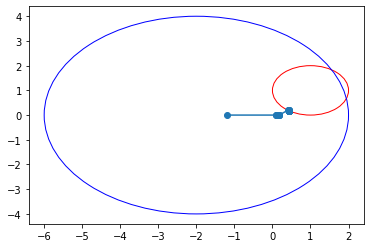

In [16]:

if __name__ == '__main__':
	
	XR = [X0]
	XS = [X0]
	while not STOP_R:
		STOP = False
		while not STOP:
			print("-------------------------------------------------")
			X1 = iteration(X0, S1, dsk_pauell)
			print(f'X_1 = {X1}')
			XS.append(X1)

			X2 = iteration(X1, S2, dsk_pauell)
			print(f'X_2 = {X2}')
			XS.append(X2)

			S1, S2 = new_s(X2, X0)
			X0 = X2
			print(f'S_1 = {S1}')
			print(f'S_2 = {S2}')
			S1_len = math.sqrt(S1[0]**2 + S1[1]**2)
			print(f'S_len = {S1_len}')
			if S1_len < END:
				STOP = True
			print("-------------------------------------------------")
			print(f'Main function counter: {COUNTER}')
			print("-------------------------------------------------")

		XR.append(X0)
		check = math.sqrt((XR[-1][0] - XR[-2][0])**2+(XR[-1][1] - XR[-2][1])**2)
		print(check)
		if check < R_EPSILON:
			STOP_R = True
		else:
			R = R * 10
			print("*************************************************")
			print(f'R: {R}')
			print("*************************************************")



	dots_x = [X[0] for X in XS]
	dots_y = [X[1] for X in XS]


	plt.figure(0)

	plt.plot(dots_x, dots_y, marker='o')
	circle1 = plt.Circle((1, 1), 1, fill = False, color = 'r')
	circle2 = plt.Circle((-2, 0), 4, fill = False, color = 'b')
	plt.gca().add_patch(circle1)
	plt.gca().add_patch(circle2)


## Висновки
В даній курсовій роботі було описано та реалізоване модифікований метод Розенброка. Метод є одночасно простим і ефективним для чисельного вирішення проблеми багатовимірної оптимізації. Для тестів методу було використано умовну та безумовну оптимізацію функції Розенброка, кожну з яких метод пройшов успішно. В якості методу одновимірного пошуку, під час тестів, був обраний ДСК-Пауєлла

## Посилання
1. - Химмельблау: "Прикладное нелинейное программирование"